<a href="https://colab.research.google.com/github/michaeljmcardoso/Horas-do-Mundo/blob/main/Gr%C3%A1fico_FusoHor%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalando os módulos necessários

Instale as bibliotecas matplotlib e pytz caso não as tenha instalado em seu ambiente Python. Para tanto, você pode usar o seguinte comando para instalá-las: 

pip install matplotlib pytz -q

Adicione um -q para uma saída mais limpa terminal ou prompt

In [1]:
!pip install matplotlib pytz -q

### Importando as bibliotecas 
Vamos utilizar a biblioteca matplotlib e seaborn para criar o gráfico e a biblioteca pytz para lidar com os fusos horários.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

Nesse exemplo que abordaremos, definimos uma lista de fusos_horarios com os fusos horários desejados, informando na lista o nome do continente seguido de uma barra ( / ) e o nome da cidade. Se houver espaço entre o nome da cidade, como no caso de São Paulo, devemos incluir um underline ( _ ) entre o nome, ficando assim: America/Sao_Paulo, tudo sem acentos.

In [27]:
# Lista com os fusos horários desejados
fusos_horarios = ['America/Sao_Paulo', 'America/New_York',
                  'Europe/London', 'America/Lima', 'Europe/Rome',
                  'Australia/Sydney', 'Europe/Paris', 'Asia/Tokyo'
                  ]


Em seguida, utilizamos um loop for para obter a hora atual em cada fuso horário e armazenamos em uma lista chamada horas. 

In [60]:
# Obtém a hora atual para cada fuso horário
horas = []
for fuso_horario in fusos_horarios:
    # Cria um objeto de fuso horário com base na string do fuso horário
    tz = pytz.timezone(fuso_horario)
    # Obtém a hora atual no fuso horário especificado
    hora_atual = datetime.now(tz).time()
    # Adiciona a hora atual à lista de horas
    horas.append(hora_atual)
    

Também criamos uma lista denominada nomes_fusos com os nomes dos fusos horários para exibir no eixo x de nosso gráfico.

In [61]:
# Cria uma lista com os nomes dos fusos horários
nomes_fusos = [tz.split('/')[1].replace('_', ' ') for tz in fusos_horarios]

# A linha acima faz o seguinte:
# - Para cada string de fuso horário em fusos_horarios, realizamos as seguintes etapas:
# - Usamos o método split('/') para dividir a string do fuso horário em duas partes, por exemplo, 'America/Sao_Paulo' se torna ['America', 'Sao_Paulo']
# - Selecionamos a segunda parte, que é o nome do fuso horário, usando [1]
# - Usamos o método replace('_', ' ') para substituir os underscores (_) por espaços em branco, por exemplo, 'Sao_Paulo' se torna 'Sao Paulo'
# - O resultado final é adicionado à lista nomes_fusos


Depois, utilizamos a função plt.subplots() do matplotlib para criar um gráfico de barras, utilizando os nomes dos fusos horários como rótulos no eixo x e as horas correspondentes como valores no eixo y.

Por fim, configuramos o título e os rótulos dos eixos do gráfico e exibimos o gráfico com a função plt.show().

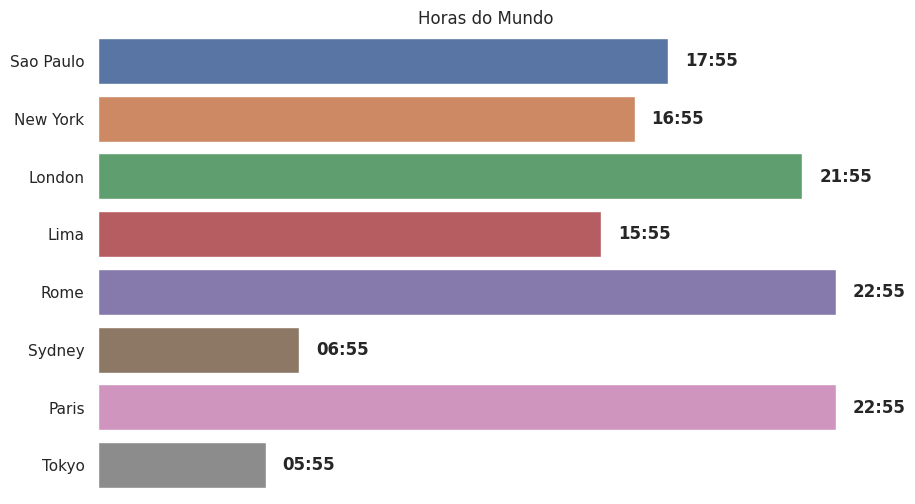

In [63]:
# Plota o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=[hora.hour for hora in horas], y=nomes_fusos)

# Configurações do gráfico
ax.set(title='Horas do Mundo')  # Título do gráfico
# ax.set(ylabel='Fuso Horário')  # Nomeia eixo y

# Removendo as linhas ao redor do gráfico
sns.set_style("whitegrid")  # Define o estilo para "whitegrid" (com grade branca)

# Remove as bordas e eixos extras
sns.despine(right=True, top=True, bottom=True, left=True)
plt.gca().axes.get_xaxis().set_visible(False)

# Remove xticks do eixo x
plt.tick_params(bottom=False, labelbottom=False)

# Adiciona os valores das horas ao lado das barras
for i, hora in enumerate(horas):
    ax.text(hora.hour + 0.5, i, hora.strftime('%H:%M'),
            ha='left', va='center', weight='bold')  # posição do texto das horas no formato de 24h, em negrito

# Exibe o gráfico
plt.show()


<p> Dentro do loop for, primeiro criamos um objeto de fuso horário usando a string do fuso horário atual em fuso_horario. A biblioteca pytz nos permite criar objetos de fuso horário com base em seus identificadores, como "America/Sao_Paulo" ou "Europe/London".</p>

<p> Em seguida, usamos datetime.now(tz).time() para obter a hora atual no fuso horário especificado. A função datetime.now(tz) retorna um objeto datetime com a data e a hora atuais no fuso horário tz, e em seguida, usamos o método .time() para extrair apenas a parte da hora.</p>

<p> A hora atual é armazenada na variável hora_atual e, em seguida, adicionada à lista horas com o método .append().</p>

<p> Ao final do loop for, teremos uma lista horas que contém a hora atual para cada fuso horário especificado em fusos_horarios.</p>

<p> A linha nomes_fusos = [tz.split('/')[1].replace('_', ' ') for tz in fusos_horarios] realiza algumas operações para criar a lista nomes_fusos:
Utilizamos uma list comprehension para iterar sobre cada string de fuso horário em fusos_horarios.</p>

<p> Para cada fuso horário, utilizamos o método split('/') para dividir a string em duas partes, utilizando a barra como separador. Por exemplo, 'America/Sao_Paulo' se torna ['America', 'Sao_Paulo'].</p>

<p> Selecionamos a segunda parte da lista resultante, que é o nome do fuso horário. Utilizamos [1] para obter essa parte.</p>

<p> Usamos o método replace('_', ' ') para substituir os underscores (_) por espaços em branco no nome do fuso horário. Por exemplo, 'Sao_Paulo' se torna 'Sao Paulo'.</p>

<p> O resultado final de cada iteração é adicionado à lista nomes_fusos.</p>

<p> Dessa forma, a lista nomes_fusos conterá os nomes dos fusos horários formatados de maneira legível para exibição no eixo x do gráfico.</p>